# **REGRESIÓN LINEAL**

## **¿Qué es la regresión lineal?**

<font size="3"> La regresión lineal es una técnica que nos permite relacionar variables a partir de la ecuación 
de una recta. Recordemos que la ecuación de una recta viene dada por la siguiente expresión:
</font>  <br><br>

<font size="5"> 

$y = \beta _0 + \beta _1 * x$  

</font>  <br>


<font size="3"> Supongamos que tenemos dos variables x, y cuyos valores se pueden ver en la tabla de abajo </font>  <br>


<font size="5">
    
| x  | y |
| -- | -- |
| 5.3  | 5.8  |
| 1.1  | 1.5  |
| ...  | ...  |
| 7.8  | 8.3  |

</font>  <br>

<font size="3"> Si graficamos estos puntos obtenemos lo siguiente </font>  <br>

![This is an image](Nube_puntos.png)



<font size="3"> La línea recta nos muestra la relación ambas variables a partir de la siguiente ecuación: </font>  <br>

<div class="alert alert-block alert-info">
<font size="5"> 
$$y _i = \beta _0 + \beta _1 * x _i$$
</font>  
</div><br>

<font size="3"> Uno podría decir que la variable Y depende de la variable X y que existe una relación lineal entre ambas. Esto últimos es importante, pues dos variables pueden tener una relación muy estrecha pero que no sea del tipo lineal. En este caso puede que la regresión lineal no sea el método más adecuado, a no ser que dichas variables se puedan transformar y que las variables transformadas si tengan efectivamente una relación lineal. 
</font>  <br>


<font size="3"> ¿Cómo se obtiene la recta? El procedimiento más utilizado se conoce como Mínimos Cuadrados Ordinarios (M.C.O)
y se ilustra en la siguiente gráfica:
</font>  <br>

![This is an image](Linea_regresión.png)

<font size="3"> El método consiste en calcular la diferencia de cada punto respecto a la recta roja. Sumamos todas estas diferencia elevadas al cuadrado y vamos modificando los parámetros de la recta de forma tal que encontremos unos parámetros que minimicen esta suma.  
</font>  <br>


## **¿A qué tipo de datos aplicar la regresión lineal?**

<font size="3"> Normalmente usamos esta técnica en datos que se denominan de corte transversal. Esto significa que son datos que son tomados en un único momento del tiempo. En finanzas, muchos de los datos que usamos son de series de tiempo. Esto no quiere decir que no podamos usar la regresión lineal, sino que debemos tener algunos cuidados especiales. Como apenas estamos introduciendo el tema, es mejor utilizar datos de corte transversal.<br>     

Podemos hacer uso de la base de datos del Banco Mundial que contiene muchas estadísticas interesantes. Es común escuchar que la educación es uno de los motores o determinantes del crecimiento económico. Parece entonces adecuado explorar si el gasto en educación como porcentaje del PIB tiene una relación estrecha con el Pib per cápita de un país. 
</font>  <br>

<div class="alert alert-block alert-warning">
<font size="3"> 
- X: Gasto en Educación como % del PIB<br>
- Y: Pib per capita en términos PPP
</font>  
</div><br>
</font>

<font size="3">
A continuación vamos a ver cómo podemos acceder a esa información a través de la librería pandas_datareader. 
</font>

In [38]:
import warnings
warnings.filterwarnings('ignore')

#Importar las librerías necesarias para descargar y visualizar datos
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from pandas_datareader import wb
from datetime import datetime
import matplotlib.pyplot as plt

#Parámetros de descarga de datos del Banco Mundial
start = datetime(1990, 1, 1)
end = datetime(2021, 12, 31)
indicator_id1 = 'NY.GDP.PCAP.KD' #GDP per capita
# indicator_id1 = 'NY.GDP.PCAP.PP.KD' #GDP per capita PPP
indicator_id2 = 'SE.XPD.TOTL.GD.ZS' #Government expenditure on education, total (% of GDP)


#Descarga de datos
gdp_per_capita = wb.download(indicator=indicator_id1, start=start, end=end, country='all')
gdp_per_capita.reset_index(inplace=True)

education_spending = wb.download(indicator=indicator_id2, start=start, end=end, country = 'all')
education_spending.reset_index(inplace=True)

In [39]:
#Utilizar los datos de un sólo año para que sea corte transversal. Utilizamos 2018 arbitrariamente
gdp_per_capita_2018 = gdp_per_capita[gdp_per_capita['year']=='2018']
education_spending_2018 = education_spending[education_spending['year']=='2018']

In [40]:
gdp_per_capita_2018

,country,year,NY.GDP.PCAP.KD
2,Africa Eastern and Southern,2018,1533.514183
33,Africa Western and Central,2018,1843.545758
64,Arab World,2018,6258.315712
95,Caribbean small states,2018,10032.486841
126,Central Europe and the Baltics,2018,14243.054242
...,...,...,...
8093,Virgin Islands (U.S.),2018,35073.630657
8124,West Bank and Gaza,2018,3417.794408
8155,"Yemen, Rep.",2018,1290.925239
8186,Zambia,2018,1368.601756


In [41]:
education_spending_2018

,country,year,SE.XPD.TOTL.GD.ZS
2,Africa Eastern and Southern,2018,4.951635
33,Africa Western and Central,2018,3.066335
64,Arab World,2018,NaN
95,Caribbean small states,2018,4.350025
126,Central Europe and the Baltics,2018,4.266920
...,...,...,...
8093,Virgin Islands (U.S.),2018,NaN
8124,West Bank and Gaza,2018,5.318870
8155,"Yemen, Rep.",2018,NaN
8186,Zambia,2018,4.739740


In [42]:
#Unir los datos en un solo DataFrame
df_TOTAL = pd.merge(education_spending_2018,gdp_per_capita_2018[['country',indicator_id1]], left_on='country',right_on='country', how='left')
df_TOTAL.dropna(inplace=True)
df_TOTAL

,country,year,SE.XPD.TOTL.GD.ZS,NY.GDP.PCAP.KD
0,Africa Eastern and Southern,2018,4.951635,1533.514183
1,Africa Western and Central,2018,3.066335,1843.545758
3,Caribbean small states,2018,4.350025,10032.486841
4,Central Europe and the Baltics,2018,4.266920,14243.054242
5,Early-demographic dividend,2018,3.979745,3521.783898
...,...,...,...,...
257,Uzbekistan,2018,5.900000,3047.308384
260,Vietnam,2018,4.167450,2456.791224
262,West Bank and Gaza,2018,5.318870,3417.794408
264,Zambia,2018,4.739740,1368.601756


In [43]:
#Filtrar usando sólo países y no las regiones que salen al principio
df_countries = df_TOTAL.iloc[49:200]

In [44]:
df_countries

,country,year,SE.XPD.TOTL.GD.ZS,NY.GDP.PCAP.KD
59,Australia,2018,5.10789,58447.252651
60,Austria,2018,5.22536,46170.394891
61,Azerbaijan,2018,2.45543,5262.183805
62,"Bahamas, The",2018,2.30952,32231.272584
65,Barbados,2018,5.42886,16838.728731
...,...,...,...,...
257,Uzbekistan,2018,5.90000,3047.308384
260,Vietnam,2018,4.16745,2456.791224
262,West Bank and Gaza,2018,5.31887,3417.794408
264,Zambia,2018,4.73974,1368.601756


In [46]:
#Cambiar el nombre de las columna
df_countries.rename(columns={indicator_id2: 'GastoEduc', indicator_id1: 'Pibpercap'}, inplace=True)

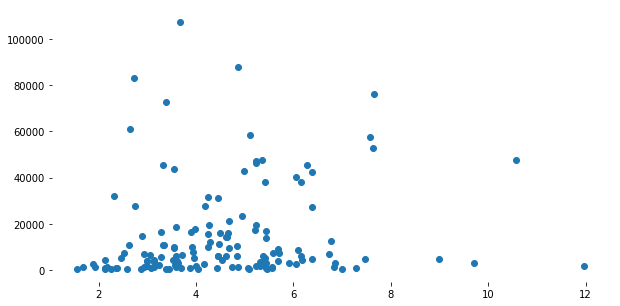

In [47]:
#Hacer un gráfico de los puntos
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_countries['GastoEduc'],df_countries['Pibpercap'])
plt.box(on=None)
plt.show()

<font size="3">
Aunque se podría inferir una relación creciente entre el gasto en educación como porcentaje del PIB y el PIB per cápita, no es del todo clara. En Python podemos utilizar la librería statsmodels para hacer regresiones lineales. Esta librería nos permite visualizar las principales estadísticas que resultan al aplicar esta técnica de modelación de datos. Veamos:
</font>

In [9]:
import statsmodels.formula.api as sm
model1 = 'Pibpercap ~ GastoEduc'
lm1   = sm.ols(formula = model1, data = df_countries).fit()
print('REGRESIÓN LINEAL CLÁSICA - MODELO1')
print(lm1.summary())
print('-------------------------------------------------------------')

REGRESIÓN LINEAL CLÁSICA - MODELO1
                            OLS Regression Results                            
Dep. Variable:              Pibpercap   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.634
Date:                Tue, 22 Mar 2022   Prob (F-statistic):              0.107
Time:                        13:59:07   Log-Likelihood:                -1584.7
No. Observations:                 140   AIC:                             3173.
Df Residuals:                     138   BIC:                             3179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7352.

In [10]:
df_countries['ln_Pibpercap'] = np.log(df_countries['Pibpercap'])

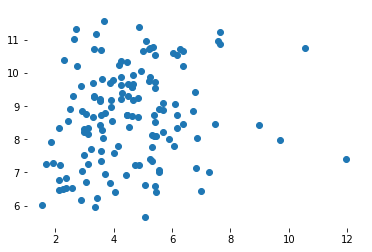

In [11]:
#Hacer un gráfico de los puntos
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_countries['GastoEduc'],df_countries['ln_Pibpercap'])
plt.box(on=None)
plt.show()

In [12]:
model2 = 'ln_Pibpercap ~ GastoEduc'
lm2   = sm.ols(formula = model2, data = df_countries).fit()
print('REGRESIÓN LINEAL CLÁSICA - MODELO2')
print(lm2.summary())
print('-------------------------------------------------------------')

REGRESIÓN LINEAL CLÁSICA - MODELO2
                            OLS Regression Results                            
Dep. Variable:           ln_Pibpercap   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.633
Date:                Tue, 22 Mar 2022   Prob (F-statistic):             0.0331
Time:                        13:59:07   Log-Likelihood:                -247.00
No. Observations:                 140   AIC:                             498.0
Df Residuals:                     138   BIC:                             503.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.

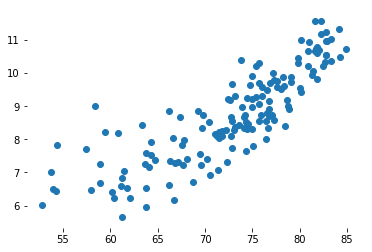

In [13]:
indicator_id3 = 'SP.DYN.LE00.IN' #Life expectacy

#Descarga de datos
life_expectancy = wb.download(indicator=indicator_id3, start=start, end=end, country='all')
life_expectancy.reset_index(inplace=True)
life_expectancy_2018 = life_expectancy[life_expectancy['year']=='2018']


df_TOTAL2 = pd.merge(life_expectancy_2018,gdp_per_capita_2018[['country','NY.GDP.PCAP.KD']], left_on='country',right_on='country', how='left')
df_TOTAL2.dropna(inplace=True)
df_countries2 = df_TOTAL2.iloc[49:200]
df_countries2.rename(columns={'SP.DYN.LE00.IN': 'ExpVida', indicator_id1: 'Pibpercap'}, inplace=True)
df_countries2['ln_Pibpercap'] = np.log(df_countries2['Pibpercap'])

#Hacer un gráfico de los puntos
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_countries2['ExpVida'],df_countries2['ln_Pibpercap'])
plt.box(on=None)
plt.show()


In [14]:
model3 = 'ExpVida ~ ln_Pibpercap'
lm3   = sm.ols(formula = model3, data = df_countries2).fit()
print('REGRESIÓN LINEAL CLÁSICA - MODELO3')
print(lm3.summary())
print('-------------------------------------------------------------')

REGRESIÓN LINEAL CLÁSICA - MODELO3
                            OLS Regression Results                            
Dep. Variable:                ExpVida   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     373.2
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           2.05e-42
Time:                        13:59:14   Log-Likelihood:                -427.29
No. Observations:                 151   AIC:                             858.6
Df Residuals:                     149   BIC:                             864.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    

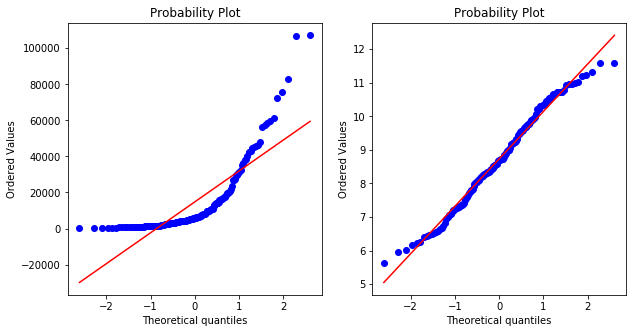

In [34]:
from scipy import stats

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
stats.probplot(x=df_countries2['Pibpercap'], dist = "norm", plot = ax[0])
stats.probplot(x=df_countries2['ln_Pibpercap'], dist = "norm", plot = ax[1])
plt.show()

# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))
# sns.scatterplot(x='FX_EM',y='Residuals',data=df_regresion2,ax=ax[0])

Text(0.5, 1.0, 'PIB PER CAP vs. EXP VIDA')

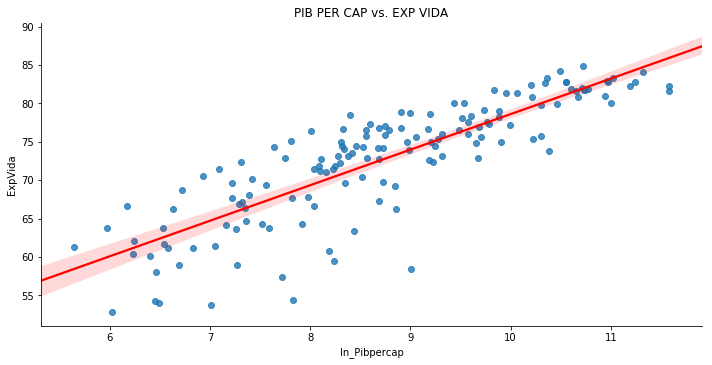

In [16]:
sns.lmplot(x='ln_Pibpercap',y='ExpVida',data=df_countries2, 
           line_kws = {'color': "red"} ,aspect= 2)
plt.title("PIB PER CAP vs. EXP VIDA")

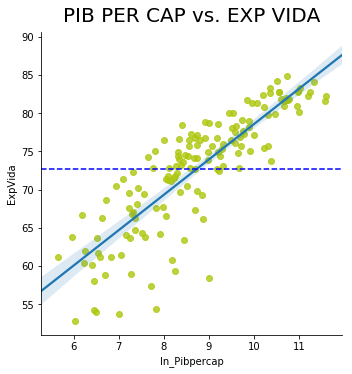

In [23]:
sns.lmplot(x = 'ln_Pibpercap', y = 'ExpVida', data = df_countries2, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("PIB PER CAP vs. EXP VIDA", fontsize=20, verticalalignment='bottom')
plt.axhline(df_countries2['ExpVida'].mean(), ls='--',color = 'b')
plt.xlabel("ln_Pibpercap")
plt.ylabel("ExpVida");

In [17]:
price,fitted_lambda = stats.boxcox(df_countries2['ln_Pibpercap'])
round(fitted_lambda,2)

0.95

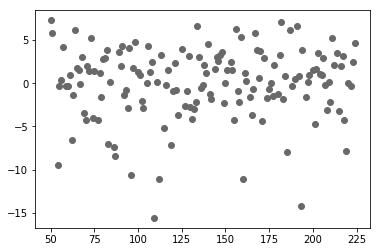

In [18]:
plt.plot(lm3.resid,marker='o',linestyle='None',color='dimgrey')

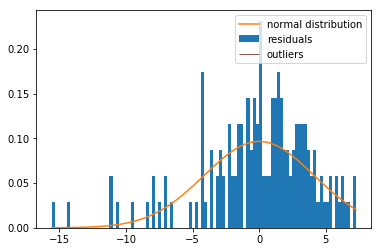

In [19]:
plt.hist(lm3.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(lm3.resid.min(), lm3.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(lm3.scale)),
    label="normal distribution")
outliers = np.abs(lm3.resid)>4*np.sqrt(lm3.scale)
sns.rugplot(lm3.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right")

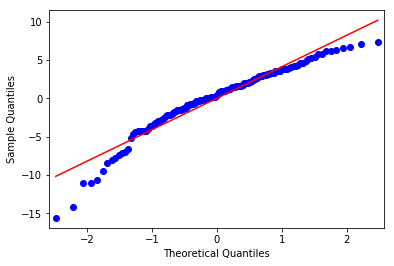

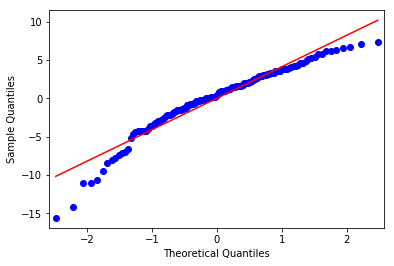

In [35]:
import statsmodels.api as sm
sm.qqplot(lm3.resid, line="s")

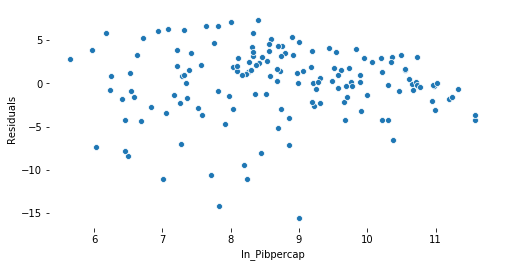

In [20]:
bins = np.array([0, 1000, 2000, 3000, 4000])
df_countries2['Residuals']=lm3.resid.values
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
sns.scatterplot(x='ln_Pibpercap',y='Residuals',data=df_countries2)
plt.box(on=None)

In [21]:
from sklearn.linear_model import LinearRegression

X = df_countries['SE.XPD.TOTL.GD.ZS']
y = df_countries['NY.GDP.PCAP.KD']

# X_train =  X.iloc[0:120]
# X_test = X.iloc[121:150]
# y_train= y.iloc[0:120]
# y_test = y.iloc[121:150]

X_train =  X[0:120]
X_test = X[121:150]
y_train= y[0:120]
y_test = y[121:150]


linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
print('R2 =',linear.score(X_test,y_test))

C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
 

KeyError: 'SE.XPD.TOTL.GD.ZS'

In [ ]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

In [ ]:
y_pred = linear.predict(X_test)

plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')

plt.xlabel(r'Engine size')
plt.ylabel(r'Price')

plt.show()

> Text that is a quote

`Here is some code!`

***

Here is some important text!

***


Our program website can be found at <a href="http://earthdatascience.org" target="_blank">this link</a>.

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>



In [ ]:
X_train